In [117]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [118]:
df = pd.read_csv('data/user_behavior_data.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            630 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    float64
 8   Age                         665 non-null    float64
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 60.3+ KB


In [120]:
df.drop(columns = 'User ID', inplace = True)

In [121]:
categorical_data = ['Device Model', 'Operating System', 'Gender']

In [122]:
df.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [123]:
# null
# Operating System-->categorical
# Data Usage (MB/day)-->float           
# Age -->float                          
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

Device Model                   0.0
Operating System              10.0
App Usage Time (min/day)       0.0
Screen On Time (hours/day)     0.0
Battery Drain (mAh/day)        0.0
Number of Apps Installed       0.0
Data Usage (MB/day)           20.0
Age                            5.0
Gender                         0.0
User Behavior Class            0.0
dtype: float64

<Axes: >

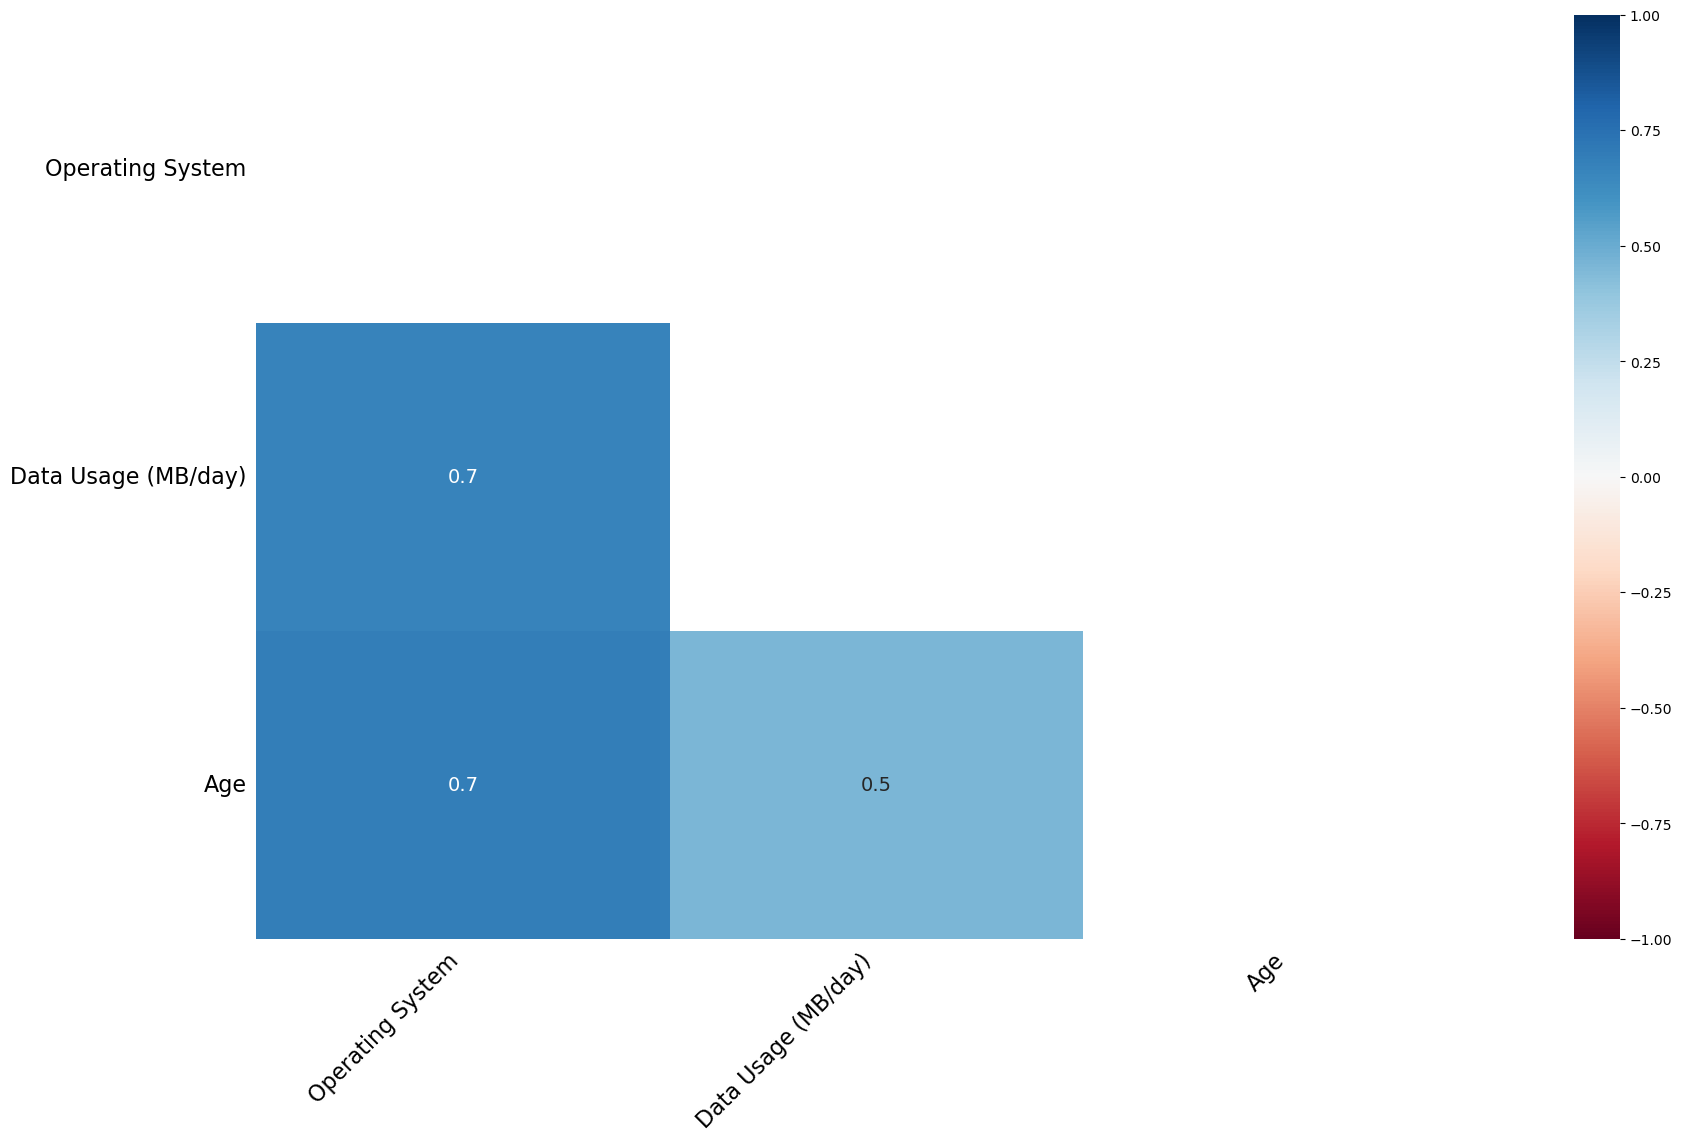

In [124]:
msno.heatmap(df)

In [125]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[['Device Model', 'Operating System', 'Gender']]= enc.fit_transform(df[['Device Model','Operating System', 'Gender']])


In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Operating System','Data Usage (MB/day)','Age']] = scaler.fit_transform(df[['Operating System','Data Usage (MB/day)','Age']])


In [127]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')
df[['Operating System','Data Usage (MB/day)','Age']] = imputer.fit_transform(df[['Operating System','Data Usage (MB/day)','Age']])

In [128]:
df.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [132]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=['User Behavior Class']), df['User Behavior Class']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)


In [144]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_X = scaler.fit_transform(train_X)

test_X = scaler.fit_transform(test_X)

In [148]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1).fit(train_X, train_y)


In [152]:
pred_y = model.predict(test_X)

In [162]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(test_y,pred_y))
print(classification_report(test_y,pred_y))
print(confusion_matrix(test_y, pred_y))

0.9857142857142858
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

[[29  0  0  0  0]
 [ 2 26  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 24]]


In [166]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid = {
    "n_estimators":[100,200],
    "max_depth" :[3,6,10],
    "learning_rate":[0.01, 0.1, 0.5]
    },
    cv=5
)

grid_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200]})

In [168]:
print('Best Hyperparameter:',grid_search.best_params_)

Best Hyperparameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [170]:
model = XGBClassifier(learning_rate=0.01, max_depth=3,n_estimators=100).fit(train_X, train_y)

In [172]:
pred_y = model.predict(test_X)

In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(test_y,pred_y))
print(classification_report(test_y,pred_y))
print(confusion_matrix(test_y, pred_y))

0.9857142857142858
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

[[29  0  0  0  0]
 [ 2 26  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 24]]
